# NDVI AND NDRE

In [2]:
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
from matplotlib import pyplot
from osgeo import gdal
import sys

In [3]:
ds = gdal.Open('San_Guillermo/Ortomosaico.tif', gdal.GA_ReadOnly)
rb = ds.GetRasterBand(1)
img_array = rb.ReadAsArray()

AttributeError: 'NoneType' object has no attribute 'GetRasterBand'

In [ ]:
img_array

In [ ]:
import rasterio
dataset = rasterio.open('San_Guillermo/Ortomosaico.tif')

dataset.count

In [ ]:
rojovis=dataset.read(1) #red
verdevis=dataset.read(2) #green
bluevis=dataset.read(3) #blue
b4=dataset.read(4) #alpha


In [ ]:
b4.min()

In [4]:
pyplot.imshow(b1)
pyplot.show()

NameError: name 'b1' is not defined

In [5]:
pyplot.imshow(b2)
pyplot.show()

NameError: name 'b2' is not defined

In [6]:
pyplot.imshow(b3)
pyplot.show()

NameError: name 'b3' is not defined

In [7]:
pyplot.imshow(b4)
pyplot.show()

NameError: name 'b4' is not defined

In [8]:
ndvi = (b2-b1)/(b2+b1)
pyplot.imshow(ndvi)
pyplot.show()

NameError: name 'b2' is not defined

In [9]:
ndvi = (b3-b1)/(b3+b1)
pyplot.imshow(ndvi)
pyplot.show()

NameError: name 'b3' is not defined

In [10]:
ndvi_real = rasterio.open('NDVI.tif')
ndvi_red=dataset.read(1) #red
ndvi_real.count

NameError: name 'rasterio' is not defined

In [11]:
pyplot.imshow(ndvi_red)
pyplot.show()

NameError: name 'ndvi_red' is not defined

In [12]:
ndvi

NameError: name 'ndvi' is not defined

ndre = (nir -rededge)(nir + rededge)

ndvi = (nir -rojovis)(nir + rojovis)

# READ KMZ TRANSFORM SHAPE CORRECTLY

In [13]:
import geotable

In [14]:
t = geotable.load('T2_P7.kmz')

GeoTableError: file unloadable (T2_P7.kmz)

In [ ]:
t.iloc[0]
t.save_shp('T2_P7.zip')

In [15]:
#os.system('unzip T2_P7.zip *')

# TRANSFORM SHAPE ERROR

In [16]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.mask import mask
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from keyholemarkup_converter import  keyholemarkup2x

In [17]:
a = keyholemarkup2x('T2_P7.kmz',output='shp')

FileNotFoundError: [Errno 2] No such file or directory: 'T2_P7.kmz'

In [ ]:
a

# CLIP RASTER WITH SHAPE

In [ ]:
from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy
import shapefile

ShapeRecords: [<shapefile.ShapeRecord object at 0x7f181b700040>]

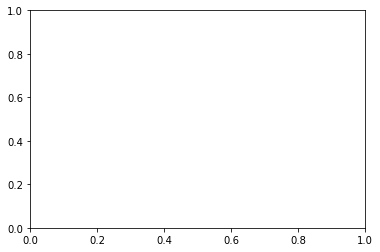

In [191]:
fig = plt.figure()
ax = fig.add_subplot(111)

sf = shapefile.Reader("T2_P7")
sf.shapeRecords()

15
[-70.89619160902487, -33.76822985982048, -70.89599389363235, -33.76803355030987]


ValueError: operands could not be broadcast together with shapes (4,8431,6600) (4,8431) 

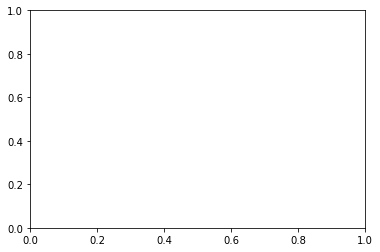

In [193]:

for shape_rec in sf.shapeRecords():
 
    vertices = []
    codes = []
    pts = shape_rec.shape.points
    prt = list(shape_rec.shape.parts) + [len(pts)]
    for i in range(len(prt) - 1):
        for j in range(prt[i], prt[i+1]):
            vertices.append((pts[j][0], pts[j][1]))
        codes += [Path.MOVETO]
        codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
        codes += [Path.CLOSEPOLY]
    clip = Path(vertices, codes)
    clip = PathPatch(clip, transform=ax.transData)

import shapefile
sf = shapefile.Reader("T2_P7.shp")
print(sf.shapeType)

print(sf.bbox) #longitud, latitud, longitud, latitud
m = Basemap(
    llcrnrlon=sf.bbox[0],  #longitude of lower left hand corner of the desired map domain
    llcrnrlat=sf.bbox[1], #latitude of lower left hand corner of the desired map domain
    urcrnrlon=sf.bbox[2], #longitude of upper right hand corner of the desired map domain
    urcrnrlat=sf.bbox[3], #latitude of upper right hand corner of the desired map domain
    resolution = None, 
    projection = 'cyl')

ds = gdal.Open('output/file_ndvi.tif')
data = ds.ReadAsArray()

gt = ds.GetGeoTransform()
x = numpy.linspace(gt[0], gt[0] + gt[1] * data.shape[1], data.shape[1])
y = numpy.linspace(gt[3], gt[3] + gt[5] * data.shape[0], data.shape[0])

xx, yy = numpy.meshgrid(x, y)

cs = m.contourf(xx,yy,data,range(0, 3600, 200))

for contour in cs.collections:
        contour.set_clip_path(clip)

plt.show()

# CLIP RASTER WITHOUT ERROR RESULTS NUMPY ARRAY

In [18]:
import gdal
import ogr, osr

# converts coordinates to index

def bbox2ix(bbox,gt):
    xo = int(round((bbox[0] - gt[0])/gt[1]))
    yo = int(round((gt[3] - bbox[3])/gt[1]))
    xd = int(round((bbox[1] - bbox[0])/gt[1]))
    yd = int(round((bbox[3] - bbox[2])/gt[1]))
    return(xo,yo,xd,yd)

def rasclip(ras,shp):
    ds = gdal.Open(ras)
    gt = ds.GetGeoTransform()

    driver = ogr.GetDriverByName("ESRI Shapefile")
    dataSource = driver.Open(shp, 0)
    layer = dataSource.GetLayer()

    for feature in layer:

        xo,yo,xd,yd = bbox2ix(feature.GetGeometryRef().GetEnvelope(),gt)
        arr = ds.ReadAsArray(xo,yo,xd,yd)
        yield arr

    layer.ResetReading()
    ds = None
    dataSource = None

In [19]:
gen = rasclip('output/file_ndvi.tif','T2_P7.shp')

In [20]:
gen

<generator object rasclip at 0x7f0f4121c200>

In [21]:
clip = next(gen)

In [22]:
clip

array([[[237, 244, 226, ..., 255, 255, 255],
        [251, 247, 252, ..., 255, 255, 255],
        [255, 249, 255, ..., 255, 255, 255],
        ...,
        [237, 237, 212, ..., 160,  99, 112],
        [208, 208, 187, ..., 138, 104, 188],
        [162, 167, 167, ..., 162, 172, 196]],

       [[255, 255, 255, ..., 162, 170, 166],
        [243, 246, 250, ..., 164, 161, 161],
        [224, 230, 240, ..., 156, 147, 153],
        ...,
        [254, 254, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ..

TypeError: Invalid shape (4, 373, 375) for image data

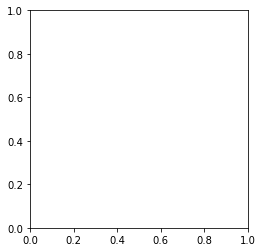

In [23]:
pyplot.imshow(clip)
pyplot.show()

# SHOW NDVI

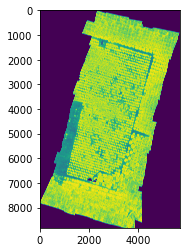

In [24]:
from PIL import Image
ndvi = Image.open("NDVI.tif").convert('L')
pyplot.imshow(ndvi)
pyplot.show()

# EXTENSION

In [133]:
import shapefile
sf = shapefile.Reader("T2_P7.shp")
print(sf.shapeType)

print(sf.bbox) #longitud, latitud, longitud, latitud

15
[-70.89619160902487, -33.76822985982048, -70.89599389363235, -33.76803355030987]


# reproject geotif CORRECTLY

In [129]:
#from osgeo import gdal

#filename = inraster
#input_raster = gdal.Open(filename)
#for epsg in ["EPSG:4839", "EPSG:3068", "EPSG:25833"]:
#    gdal.Warp('output_raster' + epsg + '.tif', input_raster, dstSRS=epsg)

In [130]:
import os
import numpy as np
import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import earthpy as et

In [131]:
def reproject_et(inpath, outpath, new_crs):
    dst_crs = new_crs # CRS for web meractor 

    with rio.open(inpath) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        with rio.open(outpath, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)

In [128]:
reproject_et('San_Guillermo/Ortomosaico.tif','output/file.tif',new_crs = 'EPSG:4326')
reproject_et('NDVI.tif','output/file_ndvi.tif',new_crs = 'EPSG:4326')

# CLIP WITHOUT ERROR

In [98]:
import fiona
from rasterstats.io import Raster

def clip_raster_by_shp(rasterpath, shppath, band=1):
    """
    Given an input raster (path) and shapefile (path), returns the raster object
    corresponding to the raster defined by the bounds of the shapefile
    """

    with fiona.open(shppath) as f:
        geom_bounds = f.bounds

    with Raster(rasterpath, band=band) as raster_obj:
        rast = raster_obj.read(bounds=geom_bounds) 

    return rast

result=clip_raster_by_shp('output/tif/NDVI.tif','lines1234.shp')
result.shape

/usr/local/lib/python3.8/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


(373, 376)

In [99]:
result.shape

(373, 376)

In [100]:
result

TypeError: float() argument must be a string or a number, not 'Raster'

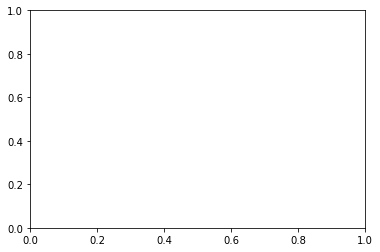

In [103]:
plt.plot(result)

# CLIP

[-70.89619160902487, -33.76822985982048, -70.89599389363235, -33.76803355030987]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
8431
8431


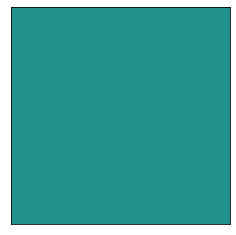

In [97]:
from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy
import shapefile

fig = plt.figure()
ax = fig.add_subplot(111)

sf = shapefile.Reader("lines1234.shp")

print(sf.bbox) #longitud, latitud, longitud, latitud
for shape_rec in sf.shapeRecords():
   
    vertices = []
    codes = []
    pts = shape_rec.shape.points
    prt = list(shape_rec.shape.parts) + [len(pts)]
    for i in range(len(prt) - 1):
        for j in range(prt[i], prt[i+1]):
            vertices.append((pts[j][0], pts[j][1]))
        codes += [Path.MOVETO]
        codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
        codes += [Path.CLOSEPOLY]
    clip = Path(vertices, codes)
    clip = PathPatch(clip, transform=ax.transData)


m = Basemap(llcrnrlon=sf.bbox[0],
    llcrnrlat=sf.bbox[1],
    urcrnrlon=sf.bbox[2],
    urcrnrlat=sf.bbox[3],
    resolution = None, 
    projection = 'cyl')
#-70.89619160902487, -33.76822985982048, -70.89599389363235, -33.76803355030987
ds = gdal.Open('output/tif/NDVI.tif')
#ds = ds.GetRasterBand(1)
#print(ds)
data = ds.ReadAsArray()[1]
print(data)
gt = ds.GetGeoTransform()
x = numpy.linspace(gt[0], gt[0] + gt[1] * data.shape[1], data.shape[1])
y = numpy.linspace(gt[3], gt[3] + gt[5] * data.shape[0], data.shape[0])

xx, yy = numpy.meshgrid(x, y)

print(len(xx))
print(len(yy))
cs = m.contourf(xx,yy,data,range(0,8818,5671))

for contour in cs.collections:
        contour.set_clip_path(clip)

plt.show()

 ...]

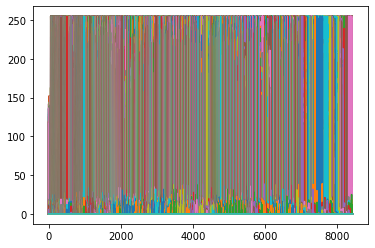

In [136]:
plt.plot(data)

# test process image

In [70]:
import numpy as np
import gdal
import ogr, osr
chm_dataset = gdal.Open('output/clip_NDVI/NDVI_T2 P6.tif')

In [71]:
#Display the dataset dimensions, number of bands, driver, and geotransform 
cols = chm_dataset.RasterXSize; print('# of columns:',cols)
rows = chm_dataset.RasterYSize; print('# of rows:',rows)
print('# of bands:',chm_dataset.RasterCount)
print('driver:',chm_dataset.GetDriver().LongName)


# of columns: 413
# of rows: 384
# of bands: 4
driver: GeoTIFF


In [72]:
print('projection:',chm_dataset.GetProjection())

projection: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [73]:
print('geotransform:',chm_dataset.GetGeoTransform())

geotransform: (-70.8960520685065, 5.267371250802094e-07, 0.0, -33.76806978941603, 0.0, -5.267371250802094e-07)


In [74]:
chm_mapinfo = chm_dataset.GetGeoTransform()
xMin = chm_mapinfo[0]
yMax = chm_mapinfo[3]

xMax = xMin + chm_dataset.RasterXSize/chm_mapinfo[1] #divide by pixel width 
yMin = yMax + chm_dataset.RasterYSize/chm_mapinfo[5] #divide by pixel height (note sign +/-)
chm_ext = (xMin,xMax,yMin,yMax)
print('chm raster extent:',chm_ext)

chm raster extent: (-70.8960520685065, 784072249.6891165, -729016428.6947156, -33.76806978941603)


In [75]:
chm_raster = chm_dataset.GetRasterBand(2)
noDataVal = chm_raster.GetNoDataValue(); print('no data value:',noDataVal)
scaleFactor = chm_raster.GetScale(); print('scale factor:',scaleFactor)
chm_stats = chm_raster.GetStatistics(True,True)
print('SERC CHM Statistics: Minimum=%.2f, Maximum=%.2f, Mean=%.3f, StDev=%.3f' % 
      (chm_stats[0], chm_stats[1], chm_stats[2], chm_stats[3]))

no data value: None
scale factor: 1.0
SERC CHM Statistics: Minimum=0.00, Maximum=255.00, Mean=208.821, StDev=56.286


In [76]:
chm_array = chm_dataset.GetRasterBand(1).ReadAsArray(0,0,cols,rows).astype(np.float)
chm_array[chm_array==noDataVal]=np.nan #Assign CHM No Data Values to NaN
chm_array=chm_array/scaleFactor
print('SERC CHM Array:\n',chm_array) #display array values

SERC CHM Array:
 [[  0.   0.   0. ...   0.   0.   0.]
 [184. 207. 193. ... 237. 218.   0.]
 [166. 219. 216. ... 245. 232.   0.]
 ...
 [255. 255. 255. ... 217. 217.   0.]
 [224. 250. 255. ... 179. 179.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [77]:
# Calculate the % of pixels that are NaN and non-zero:
pct_nan = np.count_nonzero(np.isnan(chm_array))/(rows*cols)
print('% NaN:',round(pct_nan*100,2))
print('% non-zero:',round(100*np.count_nonzero(chm_array)/(rows*cols),2))

% NaN: 0.0
% non-zero: 99.24


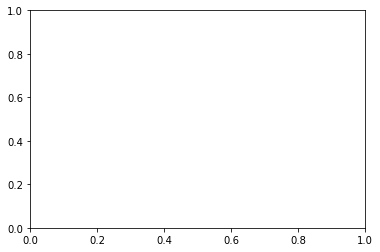

In [78]:
def plot_spatial_array(band_array,spatial_extent,colorlimit,ax=plt.gca(),title='',cmap_title='',colormap=''):
    plot = plt.imshow(band_array,extent=spatial_extent,clim=colorlimit); 
    cbar = plt.colorbar(plot,aspect=40); 
    plt.set_cmap(colormap); 
    cbar.set_label(cmap_title,rotation=90,labelpad=20);
    plt.title(title); 
    ax = plt.gca(); 
    ax.ticklabel_format(useOffset=False, style='plain'); #do not use scientific notation #
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90); #rotate x tick labels 90 degrees

Text(0, 0.5, 'Relative Frequency')

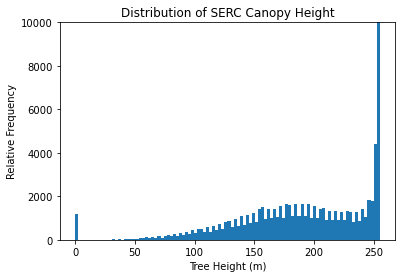

In [79]:
#https://www.neonscience.org/classify-raster-thresholds-2018-py
plt.hist(chm_array[~np.isnan(chm_array)],100);
ax = plt.gca()
ax.set_ylim([0,1e4]) #adjust the y limit to zoom in on area of interest
plt.title('Distribution of SERC Canopy Height')
plt.xlabel('Tree Height (m)'); plt.ylabel('Relative Frequency')

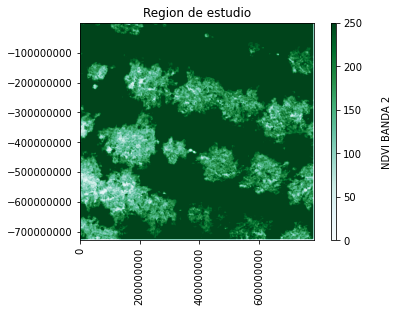

In [80]:
plot_spatial_array(chm_array,
                chm_ext,
                (0,250),
                title='Region de estudio',
                cmap_title='NDVI BANDA 2',
                colormap='BuGn')

In [81]:
import copy
chm_reclass = copy.copy(chm_array)
chm_reclass[np.where(chm_array==0)] = 1 # CHM = 0 : Class 1
chm_reclass[np.where((chm_array>0) & (chm_array<=50))] = 2 # 0m < CHM <= 10m - Class 2
chm_reclass[np.where((chm_array>50) & (chm_array<=100))] = 3 # 10m < CHM <= 20m - Class 3
chm_reclass[np.where((chm_array>100) & (chm_array<=230))] = 4 # 20m < CHM <= 30m - Class 4
chm_reclass[np.where(chm_array>230)] = 5 # CHM > 30m - Class 5

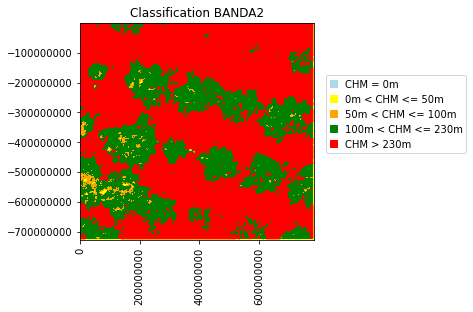

In [82]:
import matplotlib.colors as colors
plt.figure(); 
cmapCHM = colors.ListedColormap(['lightblue','yellow','orange','green','red'])
plt.imshow(chm_reclass,extent=chm_ext,cmap=cmapCHM)
plt.title('Classification BANDA2')
ax=plt.gca(); ax.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation 
rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) #rotate x tick labels 90 degrees

# Create custom legend to label the four canopy height classes:
import matplotlib.patches as mpatches
class1_box = mpatches.Patch(color='lightblue', label='CHM = 0m')
class2_box = mpatches.Patch(color='yellow', label='0m < CHM <= 50m')
class3_box = mpatches.Patch(color='orange', label='50m < CHM <= 100m')
class4_box = mpatches.Patch(color='green', label='100m < CHM <= 230m')
class5_box = mpatches.Patch(color='red', label='CHM > 230m')

ax.legend(handles=[class1_box,class2_box,class3_box,class4_box,class5_box],
          handlelength=0.7,bbox_to_anchor=(1.05, 0.4),loc='lower left',borderaxespad=0.)

# calculo de area

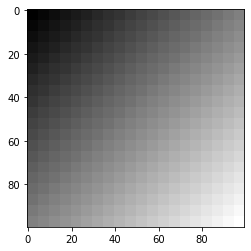

In [55]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt

# Mock up an image.
W = 100
x = np.arange(W)
y = np.arange(W)
xx,yy = np.meshgrid(x,y)

image = xx//5*5 + yy//5*5
image = image / np.max(image)  # scale into [0,1]

plt.imshow(image, interpolation='nearest', cmap='gray')
plt.show()

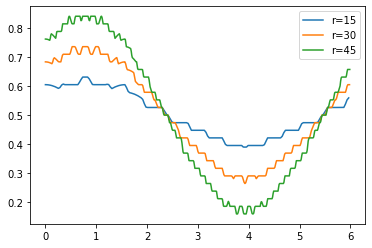

In [11]:
interp = sp.interpolate.interp2d(x, y, image)
vinterp = np.vectorize(interp)

for r in (15, 30, 45):    # radii for circles around image's center
    xcenter = len(x)/2
    ycenter = len(y)/2
    arclen = 2*np.pi*r
    angle = np.linspace(0, int(2*np.pi), int(arclen*2), endpoint=False)
    value = vinterp(xcenter + r*np.sin(angle),
                       ycenter + r*np.cos(angle))
    plt.plot(angle, value, label='r={}'.format(r))

plt.legend()
plt.show()

In [61]:
import shapely
from shapely.geometry import MultiPolygon, Point

import shapefile
pol = shapefile.Reader('output/shp/T2 P7.kmz.shp')

from osgeo import ogr
file = ogr.Open("output/shp/T2 P7.kmz.shp")
shape = file.GetLayer(0)
#first feature of the shapefile
feature = shape.GetFeature(0)
first = feature.ExportToJson()
print(first) # (GeoJSON format)
print(pol.bbox)


{"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[-70.89613303959966, -33.76803355030987, 0.0], [-70.89599389363235, -33.76807017608719, 0.0], [-70.89605192074028, -33.76822985982048, 0.0], [-70.89619160902487, -33.76819279061475, 0.0], [-70.89613303959966, -33.76803355030987, 0.0]]]}, "properties": {"Name": "T2: P7"}, "id": 0}
[-70.89619160902487, -33.76822985982048, -70.89599389363235, -33.76803355030987]


In [46]:
result = {"type":'Feature',"geometry":{ "type":'LineString', 
                                       'coordinates':[ [pol.bbox[0],pol.bbox[1]], [pol.bbox[2],pol.bbox[1]],[pol.bbox[0],pol.bbox[3]],[pol.bbox[2],pol.bbox[13] ] },
                                                      "properties": {"Name": "T2: P7"}, "id": 0}

SyntaxError: closing parenthesis '}' does not match opening parenthesis '[' (<ipython-input-46-f5f7cf72d20a>, line 1)

In [94]:
print(pol.bbox[0])
line1 = """{"type":"LineString", "coordinates":
[["""+str(pol.bbox[0])+""","""+str(pol.bbox[1])+"""],["""+str(pol.bbox[0])+""","""+str(pol.bbox[3])+"""]]}"""
line2 = """{"type":"LineString", "coordinates":
[["""+str(pol.bbox[0])+""","""+str(pol.bbox[3])+"""],["""+str(pol.bbox[2])+""","""+str(pol.bbox[3])+"""]]}"""
line3 = """{"type":"LineString", "coordinates":
[["""+str(pol.bbox[2])+""","""+str(pol.bbox[3])+"""],["""+str(pol.bbox[2])+""","""+str(pol.bbox[1])+"""]]}"""
line4 = """{"type":"LineString", "coordinates":
[["""+str(pol.bbox[2])+""","""+str(pol.bbox[1])+"""],["""+str(pol.bbox[0])+""","""+str(pol.bbox[1])+"""]]}"""

test=json.loads(line)
print(test)
from osgeo import ogr
pointogr = ogr.CreateGeometryFromJson(point)
lineogr = ogr.CreateGeometryFromJson(line)
polyogr = ogr.CreateGeometryFromJson(poly)


driver = ogr.GetDriverByName('ESRI Shapefile')
ds = driver.CreateDataSource('line.shp')
layer = ds.CreateLayer('line', geom_type=ogr.wkbLineString)
field_testfield = ogr.FieldDefn("fld_a", ogr.OFTString)
field_testfield.SetWidth(50)
layer.CreateField(field_testfield)
feature = ogr.Feature(layer.GetLayerDefn())
feature.SetField("fld_a",'test')
feature.SetGeometry(lineogr)
layer.CreateFeature(feature)
feature = None
ds = None



import fiona
import json
# shapefile schema
schema = {'geometry': 'LineString','properties': {'fld_a': 'str:50'}}

        

with fiona.open('line1.shp', 'w', 'ESRI Shapefile', schema) as layer:
      layer.write({'geometry': json.loads(line1), 'properties': {'fld_a': 'test'}})
with fiona.open('line2.shp', 'w', 'ESRI Shapefile', schema) as layer:
      layer.write({'geometry': json.loads(line2), 'properties': {'fld_a': 'test'}})
with fiona.open('line3.shp', 'w', 'ESRI Shapefile', schema) as layer:
      layer.write({'geometry': json.loads(line3), 'properties': {'fld_a': 'test'}})
with fiona.open('line4.shp', 'w', 'ESRI Shapefile', schema) as layer:
      layer.write({'geometry': json.loads(line4), 'properties': {'fld_a': 'test'}})

import shapely

# Make a MultiLineString to use for the example
inlines = shapely.geometry.MultiLineString(
    [shapely.geometry.LineString([(pol.bbox[0],pol.bbox[1]),(pol.bbox[0],pol.bbox[3])]), 
     shapely.geometry.LineString([(pol.bbox[0],pol.bbox[3]),(pol.bbox[2],pol.bbox[3])]),
     shapely.geometry.LineString([(pol.bbox[2],pol.bbox[3]),(pol.bbox[2],pol.bbox[1])]), 
     shapely.geometry.LineString([(pol.bbox[2],pol.bbox[1]),(pol.bbox[0],pol.bbox[1])])]
)

# Put the sub-line coordinates into a list of sublists
outcoords = [list(i.coords) for i in inlines]

# Flatten the list of sublists and use it to make a new line
outline = shapely.geometry.LineString([i for sublist in outcoords for i in sublist])
print(outline)
coords=[(pol.bbox[0],pol.bbox[1]),
        (pol.bbox[0],pol.bbox[3]),
        (pol.bbox[0],pol.bbox[3]),
        (pol.bbox[2],pol.bbox[3]),
        (pol.bbox[2],pol.bbox[3]),
        (pol.bbox[2],pol.bbox[1]),
        (pol.bbox[2],pol.bbox[1]),
        (pol.bbox[0],pol.bbox[1])]
aline = LineString(coords)
bline = LineString([(c[0], c[1]) for c in coords])
d = {'col1': ['name1','name2'], 'geometry': [aline, bline]}
df = gpd.GeoDataFrame(d, crs="EPSG:4326") #(change epsg)
df.to_file('lines1234.shp')

-70.89619160902487
{'type': 'LineString', 'coordinates': [[-33.76822985982048, -70.89619160902487], [-33.76822985982048, -70.89619160902487]]}
LINESTRING (-70.89619160902487 -33.76822985982048, -70.89619160902487 -33.76803355030987, -70.89619160902487 -33.76803355030987, -70.89599389363235 -33.76803355030987, -70.89599389363235 -33.76803355030987, -70.89599389363235 -33.76822985982048, -70.89599389363235 -33.76822985982048, -70.89619160902487 -33.76822985982048)


In [64]:
point = """{"type":"Point","coordinates":[108420.33,753808.59]}"""
line = """{ "type": "LineString", "coordinates": [ [100.0, 0.0], [101.0, 1.0] ]}"""
poly = """{ "type": "Polygon","coordinates": [[ [100.0, 0.0], [101.0, 0.0], [101.0, 1.0], [100.0, 1.0], [100.0, 0.0] ],[ [100.2, 0.2], [100.8, 0.2], [100.8, 0.8], [100.2, 0.8], [100.2, 0.2] ]]}"""
from osgeo import ogr
pointogr = ogr.CreateGeometryFromJson(point)
lineogr = ogr.CreateGeometryFromJson(line)
polyogr = ogr.CreateGeometryFromJson(poly)


driver = ogr.GetDriverByName('ESRI Shapefile')
ds = driver.CreateDataSource('line.shp')
layer = ds.CreateLayer('line', geom_type=ogr.wkbLineString)
field_testfield = ogr.FieldDefn("fld_a", ogr.OFTString)
field_testfield.SetWidth(50)
layer.CreateField(field_testfield)
feature = ogr.Feature(layer.GetLayerDefn())
feature.SetField("fld_a",'test')
feature.SetGeometry(lineogr)
layer.CreateFeature(feature)
feature = None
ds = None



import fiona
import json
# shapefile schema
schema = {'geometry': 'LineString','properties': {'fld_a': 'str:50'}}
with fiona.open('line2.shp', 'w', 'ESRI Shapefile', schema) as layer:
      layer.write({'geometry': json.loads(line), 'properties': {'fld_a': 'test'}})

schema = {'geometry': 'Point','properties': {'fld_a': 'str:50'}}
with fiona.open('point.shp', 'w', 'ESRI Shapefile', schema) as layer:
      layer.write({'geometry': json.loads(point), 'properties': {'fld_a': 'test'}})

schema = {'geometry': 'Polygon','properties': {'fld_a': 'str:50'}}
with fiona.open('polygon.shp', 'w', 'ESRI Shapefile', schema) as layer:
      layer.write({'geometry': json.loads(poly), 'properties': {'fld_a': 'test'}})  


In [86]:

for i in list(pol.exterior.coords):
    print(Point(i))

AttributeError: 'Reader' object has no attribute 'exterior'